In [690]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import statistics
import matplotlib.pyplot as plt

In [691]:
# Read the CSV file into a DataFrame
bpp1_data = pd.read_csv("bpp1.csv", skiprows=2)
bpp2_data = pd.read_csv("bpp2.csv", skiprows=2)
bpp3_data = pd.read_csv("bpp3.csv", skiprows=2)
bpp4_data = pd.read_csv("bpp4.csv", skiprows=2)
bpp5_data = pd.read_csv("bpp5.csv", skiprows=2)

In [692]:
bpp1_data.rename(columns={'1000': 'Weight', 'Unnamed: 1': 'Num_items'}, inplace=True)
bpp2_data.rename(columns={'1000': 'Weight', 'Unnamed: 1': 'Num_items'}, inplace=True)
bpp3_data.rename(columns={'1000': 'Weight', 'Unnamed: 1': 'Num_items'}, inplace=True)
bpp4_data.rename(columns={'1000': 'Weight', 'Unnamed: 1': 'Num_items'}, inplace=True)
bpp5_data.rename(columns={'1000': 'Weight', 'Unnamed: 1': 'Num_items'}, inplace=True)

In [693]:
bpp1 = pd.DataFrame()
# Combine the items based on weight and number of items
for index, row in bpp1_data.iterrows():
    weight = row['Weight']
    num_items = row['Num_items']
    items = pd.DataFrame({'item': [weight] * num_items})
    bpp1 = pd.concat([bpp1, items], ignore_index=True)

In [694]:
bpp2 = pd.DataFrame()
# Combine the items based on weight and number of items
for index, row in bpp2_data.iterrows():
    weight = row['Weight']
    num_items = row['Num_items']
    items = pd.DataFrame({'item': [weight] * num_items})
    bpp2 = pd.concat([bpp2, items], ignore_index=True)

In [695]:
bpp3 = pd.DataFrame()
# Combine the items based on weight and number of items
for index, row in bpp3_data.iterrows():
    weight = row['Weight']
    num_items = row['Num_items']
    items = pd.DataFrame({'item': [weight] * num_items})
    bpp3 = pd.concat([bpp3, items], ignore_index=True)

In [696]:
bpp4 = pd.DataFrame()
# Combine the items based on weight and number of items
for index, row in bpp4_data.iterrows():
    weight = row['Weight']
    num_items = row['Num_items']
    items = pd.DataFrame({'item': [weight] * num_items})
    bpp4 = pd.concat([bpp4, items], ignore_index=True)


In [697]:
bpp5 = pd.DataFrame()
# Combine the items based on weight and number of items
for index, row in bpp5_data.iterrows():
    weight = row['Weight']
    num_items = row['Num_items']
    items = pd.DataFrame({'item': [weight] * num_items})
    bpp5 = pd.concat([bpp5, items], ignore_index=True)

In [698]:
# parameters for genetic algorithm
max_bin_capacity = 1000
size_of_population = 100
mutation_rate = 0.05
crossover_rate = 0.7
elitism_rate = 0.09
number_of_generations = 500
bpp_list = [bpp1, bpp2, bpp3, bpp4, bpp5]

In [699]:
def fitness_function(item_list, max_bin_capacity):
    number_of_bins = 0
    current_capacity_of_bin = 0


    for item in item_list:
        if current_capacity_of_bin + item <= max_bin_capacity:
            # Add the size of the current item to the current bin capacity
            current_capacity_of_bin += item
        else:
            #If adding another item exceeds the bins capacity we create a new bin
            number_of_bins += 1
            # here we bring back the current_capacity_of_bin to the size of the current item
            current_capacity_of_bin = item

    return number_of_bins


In [700]:
def mutate(solution):
    mutated_solution = solution[:]
    for bin_index in range(len(mutated_solution)):
        if random.random() < mutation_rate:
            mutated_solution[bin_index] = random.randint(0, (len(solution) - 1))
    return mutated_solution

In [701]:
def crossover(parent_one, parent_two):
    if random.random() < crossover_rate:
        crossover_index_point = random.randint(1, len(parent_one) - 1)
        child1 = parent_one[:crossover_index_point] + parent_two[crossover_index_point:]
        child2 = parent_two[:crossover_index_point] + parent_one[crossover_index_point:]
        return child1, child2
    else:
        return parent_one, parent_two

In [702]:
def fittest_solution_tournament_selection(population, num_of_contestants):
    winning_parents = []
    for _ in range(2):
        if num_of_contestants > len(population):
            raise ValueError("there is not enough population for a tournament")
        tournament_participants = random.sample(population, num_of_contestants)
        fittest_individual = max(tournament_participants, key=lambda x: fitness_function(x, max_bin_capacity))
        winning_parents.append(fittest_individual)

    return winning_parents

In [703]:
def elitism(population, fitness_values, elitism_rate):
    number_of_elite_solutions = int(len(population) * elitism_rate)
    elites_selected = sorted(range(len(fitness_values)), key=lambda i: fitness_values[i], reverse=True)[:number_of_elite_solutions]
    return [population[i] for i in elites_selected]

In [704]:
def bin_packing_genetic_algorithm(items, max_bin_capacity, size_of_population, number_of_generations):
    # Initialize population 
    weights = items
    population = []
    for _ in range(size_of_population):
        shuffled_weights = list(weights)
        population.append(shuffled_weights)

    # best_solution = None
    # best_fitness = 0
    # number_of_bins_list = []  # List used for storing best fitness values for each generation
    best_solutions = []
    
    # Initialize best_fitness as a large integer
    best_fitness = float('inf')
    
    # Evolutionion loop
    for generation in range(number_of_generations):
        # Evaluate fitness of each solution
        fitness_values = []
        best_num_bins = float('inf')
        
        for solution in population:
            num_bins = fitness_function(solution, max_bin_capacity)
            fitness_values.append(num_bins)
           
       
            if num_bins < best_num_bins:
                best_num_bins = num_bins
            
        best_solutions.append(best_num_bins)      
        # Apply elitism so that we select the best solutions and keep them
        elites_selected = elitism(population, fitness_values, elitism_rate)

        # Select parents for crossover while exlcuding the already selected elite ones
        winning_parents = fittest_solution_tournament_selection(
            [solution for idx, solution in enumerate(population) if idx not in elites_selected], num_of_contestants=min(3,len(population)))  # 3 is picked through trial and error. 3 gives better balance betweeen exploration and exploitation from our findings

        # crossover and mutation to create offspring
        offspring = []
        for i in range(0, len(winning_parents), 2):
            parent_one, parent_two = winning_parents[i], winning_parents[i + 1]
            child1, child2 = crossover(parent_one, parent_two)
            child1 = mutate(child1)
            child2 = mutate(child2)
            offspring.extend([child1, child2])
            population = elites_selected + offspring
           
           
    return best_solutions

In [705]:
#Print to a file
def write_csv_file(best_solutions,idx):
    file_name = f'results/fitness_bin_packing_bpp{idx + 1}.csv'
    with open(file_name, 'w') as file:
        file.write("Generation,Number of Bins\n")
        for gen, solution in enumerate(best_solutions):
            file.write(f"{gen + 1},{solution}\n")

In [706]:
# used for plotting the data, we also have csv's printed
def plot_csv_data(best_solutions, idx):
    generations = list(range(1, len(best_solutions) + 1))
    
    plt.plot(generations, best_solutions, marker='.', linestyle='-')
    plt.title(f'Fitness: Bin Packing BPP{idx + 1}')
    plt.xlabel('Generation')
    plt.ylabel('Number of Bins')
    plt.grid(True)
    plt.show()



bpp1, 300, [95, 14, 13, 12, 11, 12, 11, 11, 11, 11, 11, 11, 12, 12, 11, 10, 10, 12, 12, 10, 10, 10, 12, 11, 11, 11, 12, 10, 12, 12, 11, 11, 12, 11, 12, 11, 12, 11, 12, 11, 10, 12, 10, 11, 10, 11, 11, 12, 11, 10, 10, 11, 12, 12, 12, 11, 12, 12, 12, 12, 12, 11, 12, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11, 11, 12, 11, 12, 11, 12, 12, 11, 11, 10, 11, 11, 12, 11, 12, 12, 11, 11, 12, 12, 10, 12, 12, 11, 11, 11, 11, 10, 11, 10, 10, 12, 12, 12, 11, 12, 10, 10, 10, 10, 12, 11, 12, 11, 11, 11, 12, 11, 12, 12, 11, 11, 10, 10, 11, 11, 10, 12, 11, 12, 11, 10, 12, 11, 11, 12, 12, 11, 12, 10, 12, 11, 11, 12, 12, 10, 10, 11, 11, 10, 12, 10, 11, 12, 11, 12, 12, 11, 10, 10, 11, 12, 12, 10, 10, 11, 10, 12, 12, 11, 11, 12, 11, 11, 11, 12, 11, 10, 12, 11, 12, 10, 11, 11, 11, 12, 12, 12, 12, 11, 11, 12, 11, 10, 11, 11, 10, 11, 11, 11, 12, 12, 11, 12, 10, 10, 12, 12, 12, 12, 10, 11, 12, 11, 12, 11, 12, 11, 11, 12, 11, 10, 11, 11, 12, 11, 12, 12, 10, 11, 11, 12, 11, 11, 11, 12, 11, 11, 11, 10, 12, 10, 12, 

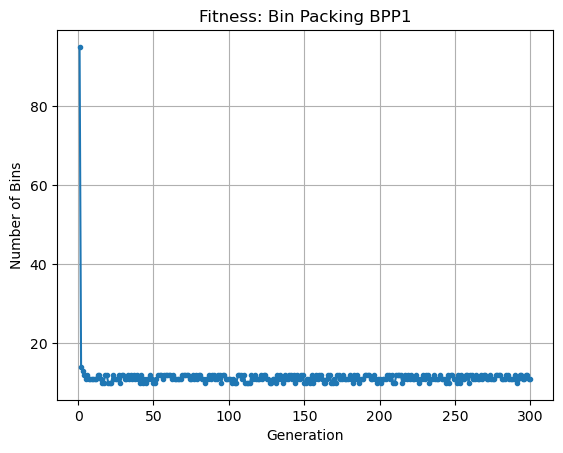

bpp2, 300, [95, 15, 12, 12, 10, 12, 10, 11, 12, 12, 12, 12, 12, 11, 10, 12, 11, 10, 12, 11, 12, 12, 11, 12, 11, 11, 11, 12, 10, 11, 10, 12, 12, 11, 11, 11, 11, 12, 11, 12, 11, 10, 10, 12, 12, 10, 12, 11, 11, 12, 12, 11, 11, 10, 12, 11, 12, 11, 12, 11, 12, 11, 10, 10, 11, 10, 10, 11, 11, 11, 11, 12, 11, 12, 11, 10, 11, 10, 10, 11, 11, 12, 11, 12, 11, 12, 10, 11, 11, 12, 12, 11, 11, 12, 12, 12, 11, 12, 12, 12, 10, 12, 11, 12, 12, 11, 12, 10, 11, 12, 13, 12, 12, 12, 12, 10, 12, 11, 11, 11, 11, 11, 12, 11, 11, 11, 12, 11, 10, 12, 12, 11, 10, 10, 11, 12, 11, 12, 12, 10, 11, 12, 11, 11, 12, 11, 11, 12, 12, 12, 11, 12, 12, 11, 12, 11, 12, 11, 10, 12, 11, 11, 12, 11, 11, 12, 11, 11, 11, 10, 12, 11, 12, 11, 10, 11, 12, 12, 12, 12, 12, 11, 12, 11, 12, 11, 11, 12, 12, 11, 11, 12, 11, 12, 12, 11, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 12, 12, 10, 11, 12, 11, 12, 11, 11, 12, 12, 11, 12, 11, 11, 11, 12, 10, 11, 11, 12, 11, 12, 12, 10, 12, 11, 10, 11, 12, 12, 12, 11, 12, 10, 12, 11, 

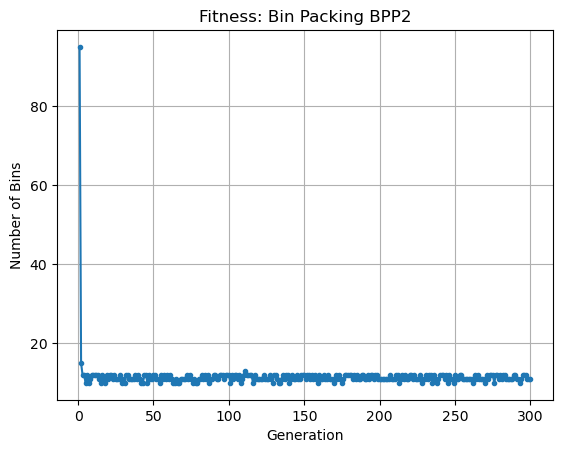

bpp3, 300, [95, 14, 11, 12, 11, 12, 10, 11, 11, 10, 12, 11, 11, 12, 10, 12, 11, 12, 12, 11, 12, 11, 11, 11, 12, 11, 11, 11, 12, 11, 10, 10, 11, 11, 11, 12, 12, 11, 12, 11, 11, 12, 12, 11, 11, 12, 12, 12, 11, 11, 12, 11, 11, 12, 11, 11, 12, 12, 11, 12, 10, 10, 12, 12, 12, 12, 11, 11, 11, 12, 10, 12, 11, 10, 12, 12, 11, 12, 11, 11, 11, 11, 12, 11, 10, 11, 12, 11, 11, 11, 12, 12, 11, 12, 11, 11, 12, 11, 12, 11, 11, 11, 12, 12, 11, 11, 11, 10, 11, 11, 11, 12, 11, 12, 12, 10, 11, 11, 11, 10, 12, 12, 12, 11, 10, 11, 11, 10, 11, 11, 12, 12, 12, 12, 12, 12, 11, 12, 12, 10, 10, 10, 11, 12, 11, 12, 12, 12, 12, 11, 12, 10, 10, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 12, 11, 10, 11, 12, 11, 12, 12, 11, 11, 10, 12, 11, 12, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 12, 12, 11, 11, 11, 11, 12, 12, 12, 12, 11, 12, 12, 10, 12, 10, 10, 10, 12, 12, 11, 11, 11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 12, 11, 10, 11, 12, 11, 12, 12, 11, 11, 11, 10, 12, 11, 12, 11, 11, 12, 11, 10, 11, 11, 12, 12, 10, 12, 12, 12, 

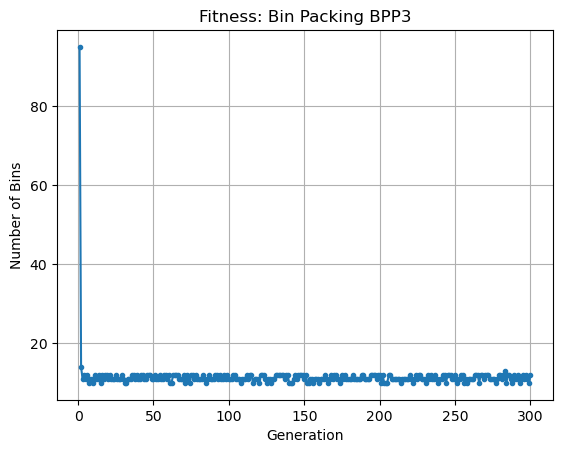

bpp4, 300, [95, 14, 11, 12, 11, 10, 12, 12, 12, 11, 12, 11, 11, 10, 12, 12, 12, 11, 11, 12, 12, 11, 12, 11, 12, 11, 10, 12, 11, 12, 12, 12, 12, 12, 10, 11, 11, 11, 11, 12, 10, 11, 11, 11, 11, 12, 12, 11, 11, 12, 11, 11, 11, 12, 11, 10, 12, 11, 12, 11, 12, 11, 11, 11, 12, 10, 12, 11, 11, 10, 11, 12, 12, 12, 11, 11, 12, 12, 11, 12, 12, 12, 10, 12, 12, 12, 12, 11, 12, 10, 10, 11, 12, 11, 11, 12, 11, 11, 11, 10, 12, 11, 11, 11, 12, 12, 11, 11, 11, 12, 11, 10, 12, 12, 11, 11, 12, 12, 12, 11, 11, 11, 12, 11, 12, 11, 11, 12, 11, 11, 11, 10, 11, 12, 11, 11, 12, 11, 11, 11, 12, 12, 10, 11, 12, 12, 11, 11, 10, 10, 11, 11, 12, 11, 10, 10, 12, 12, 11, 12, 11, 11, 11, 12, 10, 12, 11, 12, 12, 11, 10, 11, 11, 12, 12, 10, 12, 11, 12, 12, 11, 11, 12, 11, 12, 12, 10, 10, 11, 12, 12, 11, 12, 12, 11, 12, 12, 12, 10, 11, 11, 11, 10, 11, 11, 10, 11, 12, 12, 12, 11, 11, 12, 10, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 11, 11, 11, 11, 10, 12, 11, 10, 12, 12, 11, 11, 11, 11, 11, 11, 12, 10, 

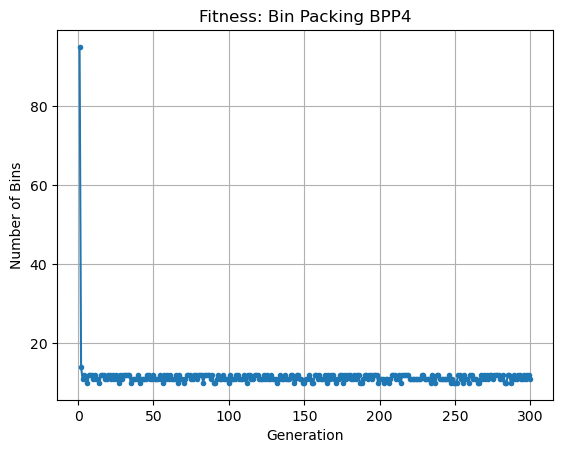

bpp5, 300, [95, 14, 12, 11, 11, 10, 11, 11, 11, 12, 12, 11, 11, 11, 11, 11, 12, 12, 12, 11, 12, 10, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 12, 12, 11, 12, 12, 12, 11, 10, 11, 12, 11, 11, 11, 12, 10, 12, 11, 12, 12, 11, 11, 12, 11, 10, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 12, 11, 12, 10, 10, 11, 12, 11, 12, 11, 11, 12, 12, 11, 11, 10, 11, 10, 11, 10, 12, 12, 11, 11, 12, 11, 12, 12, 12, 11, 11, 10, 12, 10, 11, 11, 12, 11, 10, 12, 11, 12, 12, 11, 12, 11, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 11, 11, 11, 10, 11, 12, 11, 10, 12, 12, 12, 12, 11, 11, 11, 12, 11, 12, 12, 11, 11, 11, 10, 11, 10, 11, 10, 11, 11, 11, 11, 12, 10, 11, 12, 10, 12, 11, 11, 11, 11, 12, 11, 12, 11, 12, 11, 11, 12, 11, 10, 10, 11, 11, 11, 11, 12, 12, 12, 11, 12, 12, 10, 11, 11, 10, 12, 11, 11, 12, 12, 11, 12, 12, 11, 11, 12, 11, 11, 12, 10, 11, 11, 12, 12, 11, 11, 11, 11, 12, 12, 11, 11, 12, 12, 12, 12, 11, 11, 10, 11, 10, 11, 11, 12, 12, 12, 

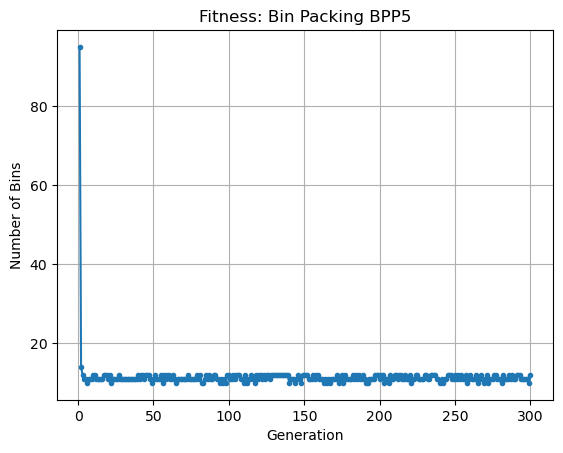

In [707]:
# Run the genetic algorithm for bin packing
for idx,items in enumerate(bpp_list):
    items = items['item'].tolist()
    best_solutions = bin_packing_genetic_algorithm(items, max_bin_capacity, size_of_population, number_of_generations)
    write_csv_file(best_solutions,idx)

#print some values that will be used for debugging and checking scores
    print(f"bpp{idx+1}, {len(best_solutions)}, {best_solutions}")
    print(min(best_solutions))
    print( " : min bins is the best solution we can achieve")
    print(statistics.mean(best_solutions))
    print(" : average number of bins")
    plot_csv_data(best_solutions, idx)